Estimated lambda: 0.5423865006026518


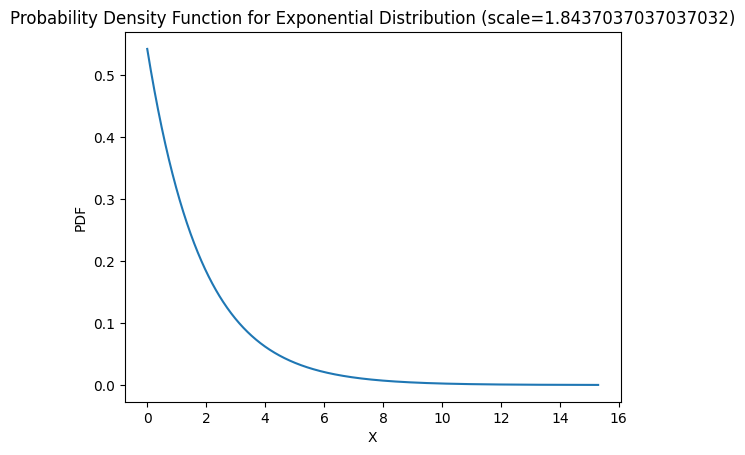

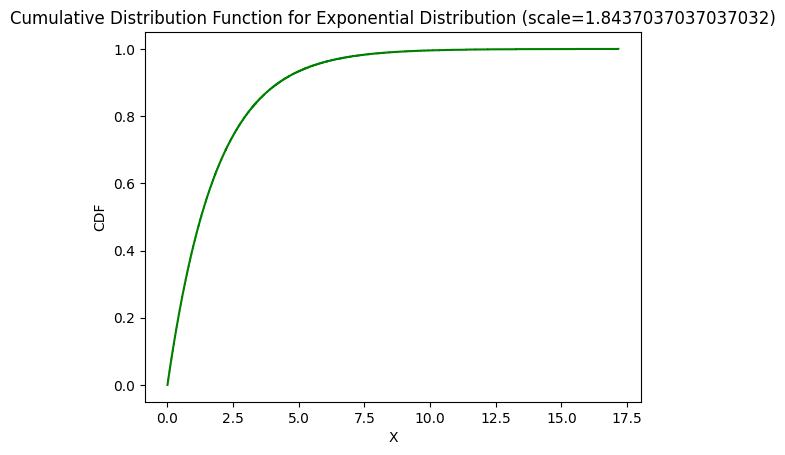

Variance is:  3.4
Expectation is:  1.84


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime


# Probability Density Function (PDF) for exponential distribution
def exponential_pdf(x, scale):
    return stats.expon.pdf(x, scale=scale)

# Cumulative Distribution Function (CDF) for exponential distribution
def exponential_cdf(x, scale):
    return stats.expon.cdf(x, scale=scale)

# Variance of exponential distribution
def exponential_variance(scale):
    return scale**2

def exponential_expectation(lambd):
    if lambd <= 0:
        raise ValueError("Parameter lambda must be greater than 0.")
    
    expectation = 1 / lambd
    return expectation

def plot_exponential_pdf(scale_param, size=10000):
    # Generate a random sample from an exponential distribution
    X = np.random.exponential(scale_param, size=size)

    # Generate values for the PDF curve
    x_pdf = np.linspace(0, max(X), 1000)
    pdf_values = exponential_pdf(x_pdf, scale_param)

    # Plot Probability Density Function (PDF) as a curve and histogram
    plt.plot(x_pdf, pdf_values)
    #plt.hist(X, bins='auto', density=True, alpha=0.5, label='Empirical PDF (Histogram)')
    plt.xlabel('X')
    plt.ylabel('PDF')
    plt.title(f'Probability Density Function for Exponential Distribution (scale={scale_param})')
    plt.show()

def plot_exponential_cdf(scale_param, size=10000):
    # Generate a random sample from an exponential distribution
    X = np.random.exponential(scale_param, size=size)

    # Sort the sample for plotting the empirical CDF
    x_cdf = np.sort(X)
    y_cdf = [exponential_cdf(x, scale_param) for x in x_cdf]

    # Plot Cumulative Distribution Function (CDF)
    plt.step(x_cdf, y_cdf, where='post', color = "green")
    plt.title(f'Cumulative Distribution Function for Exponential Distribution (scale={scale_param})')
    plt.xlabel('X')
    plt.ylabel('CDF')
    plt.show()


#Dataset can be found here: https://github.com/rashida048/Datasets/blob/master/phone_data.csv

"""This applications analyze the pattern of phone calls by observing the time between each call
and creates a model by extracting exponential distribution parameters from the given data so 
we can expect the probability of getting a call after a certain time.

we calculated the time interval between each call and stored it in time_diff list so 
we can perform our calculations.
"""
#After performing analysis to the data and taking first week as our range:

# List of time intervals
intervals = [
    "16/10/14 06:58 - 16/10/14 15:01",
    "16/10/14 15:01 - 16/10/14 15:12",
    "16/10/14 15:12 - 16/10/14 15:30",
    "16/10/14 15:30 - 16/10/14 16:21",
    "16/10/14 16:21 - 16/10/14 22:18",
    "16/10/14 22:18 - 16/10/14 22:21",
    "17/10/14 06:58 - 17/10/14 10:53",
    "17/10/14 10:53 - 17/10/14 11:19",
    "17/10/14 11:19 - 17/10/14 11:20",
    "17/10/14 11:20 - 17/10/14 17:22",
    "17/10/14 17:22 - 17/10/14 17:23",
    "17/10/14 17:23 - 17/10/14 17:26",
    "17/10/14 17:26 - 17/10/14 17:29",
    "17/10/14 17:29 - 17/10/14 17:30",
    "17/10/14 17:30 - 17/10/14 17:42",
    "17/10/14 17:42 - 17/10/14 17:44",
    "17/10/14 17:44 - 17/10/14 17:44",
    "17/10/14 17:44 - 17/10/14 17:44",
    "18/10/14 06:58 - 18/10/14 11:51",
    "18/10/14 11:51 - 18/10/14 12:06",
    "18/10/14 12:06 - 18/10/14 12:06",
    "18/10/14 12:06 - 18/10/14 13:08",
    "18/10/14 13:08 - 18/10/14 13:10",
    "18/10/14 13:10 - 18/10/14 14:01",
    "18/10/14 14:01 - 18/10/14 18:52",
    "18/10/14 18:52 - 18/10/14 20:44",
    "18/10/14 20:44 - 18/10/14 21:04",
    "18/10/14 21:04 - 18/10/14 21:06",
    "18/10/14 21:06 - 18/10/14 21:23",
    "18/10/14 21:23 - 18/10/14 22:37",
    "19/10/14 06:58 - 19/10/14 14:47",
    "19/10/14 14:47 - 19/10/14 15:46",
    "19/10/14 15:46 - 19/10/14 16:21",
    "19/10/14 16:21 - 19/10/14 16:30",
    "19/10/14 16:30 - 19/10/14 20:25",
    "20/10/14 06:58 - 20/10/14 09:43",
    "20/10/14 09:43 - 20/10/14 09:43",
    "20/10/14 09:43 - 20/10/14 13:55",
    "20/10/14 13:55 - 20/10/14 13:56",
    "20/10/14 13:56 - 20/10/14 18:14",
    "20/10/14 18:14 - 20/10/14 18:24",
    "20/10/14 18:24 - 20/10/14 19:59",
    "20/10/14 19:59 - 20/10/14 20:16",
    "21/10/14 06:58 - 21/10/14 16:17",
    "22/10/14 06:58 - 22/10/14 12:04"
]

def convert_to_datetime(timestamp_str):
    return datetime.strptime(timestamp_str, "%y/%m/%d %H:%M")

# List to store time intervals in minutes
time_intervals = []

# Iterate through each pair of timestamps and calculate the interval
for interval in intervals:
    start_str, end_str = interval.split(" - ")
    start_time = convert_to_datetime(start_str)
    end_time = convert_to_datetime(end_str)
    interval_minutes = (end_time - start_time).total_seconds() / 60
    time_intervals.append(interval_minutes)
    

# Convert time differences to hours
time_diff_hours = np.array(time_intervals) / 60.0

# Parameters for the exponential distribution
lambda_param = 1 / np.mean(time_diff_hours)
scale_param = 1 / lambda_param

print(f"Estimated lambda: {lambda_param}")

# Call the plotting functions with the estimated lambda
plot_exponential_pdf(1 / lambda_param)
plot_exponential_cdf(1 / lambda_param)



Variance = exponential_variance(scale_param)
Expectation = exponential_expectation(lambda_param)

#printing variance and expectation
print("Variance is: ", round(Variance, 2))
print("Expectation is: ", round(Expectation, 2))